Mean error:
0.04663170829268287


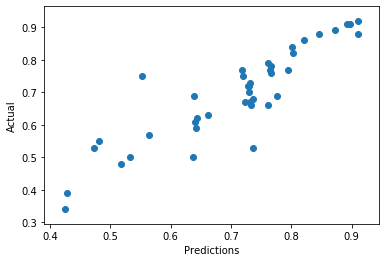

                               Country                    Region  \
0                          Afghanistan  Middle East/Central Asia   
1                              Albania   Northern/Eastern Europe   
2                              Algeria                    Africa   
3                               Angola                    Africa   
5                            Argentina             Latin America   
..                                 ...                       ...   
182  Venezuela, Bolivarian Republic of             Latin America   
183                           Viet Nam              Asia-Pacific   
185                              Yemen  Middle East/Central Asia   
186                             Zambia                    Africa   
187                           Zimbabwe                    Africa   

     Population (millions)       HDI GDP per Capita  Cropland Footprint  \
0                    29.82  0.460000        $614.66                0.30   
1                     3.16  0.730

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

footprints = pd.read_csv (r'C:/Users/enoch/Desktop/Earth/904.csv')
lisst=[]
for gdp in footprints['GDP per Capita']:
    zdp=str(gdp).replace(",","")
    gdp=str(zdp).replace("$","")
    lisst.append(float(gdp))
gdpnum = pd.DataFrame({'GDP': lisst})
footprint=footprints.join(gdpnum)
footprint = footprint.dropna(axis=0)


#Total Ecological Footprint can be from 0 to around 20, in hectares(10,000 square meters) per person
# GDP per capita is around 50,000 for USA
#HDI is from 0 to 1


y= footprint['HDI']
features = ['GDP','Total Ecological Footprint','Earths Required']
X = footprint[features]
X.describe()
# split data into training and validation data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
# Define model
footprint_model = RandomForestRegressor()
# Fit model
footprint_model.fit(train_X, train_y)
# get predicted prices on validation data
val_predictions = footprint_model.predict(val_X)
print("Mean error:")
print(mean_absolute_error(val_y, val_predictions))
plt.scatter(y=val_y,x=val_predictions)
plt.xlabel("Predictions")
plt.ylabel("Actual")

#plt.scatter(y=val_predictions,x=range(50))
plt.show()
print(footprint)

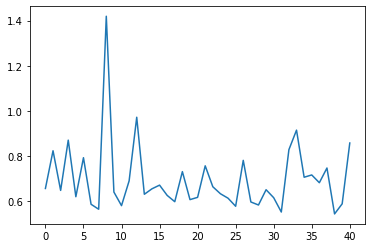

0.10926829268292684
